In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
import statsmodels.api as sm

# Project 1: Estimating the Activation Energy and Frequency Factor from Kinetic Measurements 

To estimate the activation energy $E_\mathrm{A}$ and frequency factor $A$ in the Arrhenius equation, we consider a series of reaction rate constant measurements, taken at different temperatures.

First, we load the data and visualize it:

In [27]:
temperature, k1, k2, k3, k4 = np.loadtxt('data_arrhenius_a.csv',skiprows=1,delimiter=',',unpack=True)

rateconsts = np.array([k1, k2, k3, k4])

In [28]:
plt.scatter(temperature,k1)
plt.scatter(temperature,k2)
plt.scatter(temperature,k3)
plt.scatter(temperature,k4)

#plt.xticks([1.00e-05, 3.25e-05, 5.50e-05, 7.75e-05, 1.00e-04],['0.01', '0.033', '0.055', '0.078', '0.1'])

plt.xlabel('Temperature / K',fontsize=16)
plt.ylabel('k / s',fontsize=16)

#plt.legend()

#plt.xlim([0,0.08])
#plt.ylim([0,25])

plt.show()

Next we need to transform the data: We need to plot log of the rate against the inverse temperature. Then we can calculate mean and standard deviation. With numpy this can be done in three quick lines:

In [29]:
T_inv = 1./temperature
mean_k = np.mean(np.log(rateconsts),axis=0)
std_k  = np.std(np.log(rateconsts),axis=0)

weights = 1./std_k

Next we fit a line to the data with the statsmodels library:

In [30]:
T_inv_sm = sm.add_constant(T_inv)
model = sm.WLS(mean_k, T_inv_sm, weights=weights)
results = model.fit()

# Print regression results
print(results.summary())

                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.992
Model:                            WLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 1.205e+04
Date:                Thu, 25 Apr 2024   Prob (F-statistic):          2.13e-104
Time:                        16:29:33   Log-Likelihood:                 149.78
No. Observations:                 100   AIC:                            -295.6
Df Residuals:                      98   BIC:                            -290.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.2413      0.114    256.296      0.0

Finally, we can calculate the activation energy and the frequency factors (including the error estimates) from the slope $m$ and intercept $b$:
$$
E_\mathrm{A} = -m \cdot R
$$
$$
\sigma_{E_\mathrm{A}} = \sqrt{(R^2\cdot\sigma_{m}^2)}
$$
$$
A = e^{b}
$$
$$
\sigma_{A} = \sqrt{(e^{b}\cdot\sigma_{b}^2)}
$$

In [31]:
R = 8.314 # J K-1 mol-1
A = np.exp(29.2413)
sig_A = np.sqrt(np.exp(29.2413)**2*0.114**2)
E_A = 4761.9877*R
sig_EA = np.sqrt(R**2*43.372**2)

print(f"E_A = {E_A:20.2f} +/- {sig_EA:20.2f} J/mol (+/- {100*sig_EA/E_A:8.2f} %)")
print(f"A   = {A:20.2f} +/- {sig_A:20.2f} 1/s   (+/- {100*sig_A/A:8.2f} %)")

E_A =             39591.17 +/-               360.59 J/mol (+/-     0.91 %)
A   =     5004206626765.73 +/-      570479555451.29 1/s   (+/-    11.40 %)


It's interesting to note that the (relative) uncertainty on $A$ is quite a bit higher, because it gets converted from the log-scale. Finally, we can visualize the fit:

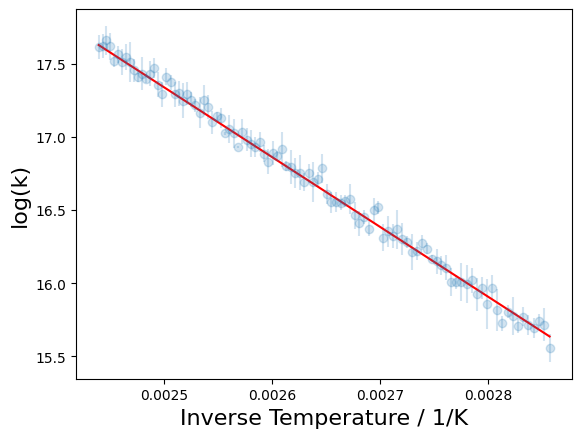

In [32]:
plt.errorbar(T_inv,mean_k,yerr=std_k,fmt='o',alpha=0.2)
plt.plot(T_inv,-4761.9877*T_inv + 29.2413,color='r')

#plt.xticks([1.00e-05, 3.25e-05, 5.50e-05, 7.75e-05, 1.00e-04],['0.01', '0.033', '0.055', '0.078', '0.1'])

plt.xlabel('Inverse Temperature / 1/K',fontsize=16)
plt.ylabel('log(k)',fontsize=16)

#plt.legend()

#plt.xlim([0,0.08])
#plt.ylim([0,25])

plt.show()